# Into the Wild

The movie Into the Wild illustrates how going out into the unknown can be both thrilling and perilous. This project attempts to address some of the fears people may have when travelling to another country by assigning a score based on a range of relevant data points that varies according to specific user preferences. 

## Import libraries

In [1]:
# imports key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Functions

### Process data

#### Z-scores

In [59]:
# returns a list of z-scores
def z_score(values):
    mean = np.mean(values)
    std = np.std(values)
    z_scores = []
    for i in range(len(values)):
        z_scores.append( (values[i] - mean) / std )
    return z_scores

# returns a grouped summed dataframe
def grouped_sum(df, group_by='Country Name', value='Value'):
    return df.groupby(group_by).sum(value)

# returns a list of z-score dataframes 
def z_df(dfs):
    z_dfs = []
    for i in range(len(dfs)):
        avg = grouped_sum(eval(dfs[i]))
        avg.Value = z_score(list(avg.Value))
        z_dfs.append(avg)
    return z_dfs

#### Averages

In [ ]:
# returns the index of the longest dataframe
def longest_index(df):
    return list(df[max([len(i) for i in enumerate(df)])-1].index)

# returns a list of averages based on a list of dataframes and weights
def avg_df(dfs, weights):
    z_dfs = z_df(dfs)
    longest_df_countries = longest_index(z_dfs)
    avgs = []
    for i in range(len(longest_df_countries)):
        country = longest_df_countries[i]
        values = []
        for i in range(len(dfs)):
            try:
                values.append( z_dfs[i].loc[z_dfs[i].index==country].Value[0] * weights[i] )
            except:
                pass
        avgs.append( np.sum(values) / len(values) )
    avgs_df = pd.DataFrame({'Avg': avgs})
    avgs_df.index = longest_df_countries
        
    return avgs_df

### Get barplots

#### Dataframes

In [65]:
# stop user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# gets a list of barplots based on income, regions and best and worst countries
def barplot_dfs(df):
    income_df = df[df.index.isin(income_classifications)].loc[income_classifications]
    regions_df = df[df.index.isin(regions)].loc[regions].sort_values('Avg', ascending=False)
    country_names = list(df.loc[(df.index.isin(income_classifications)==False) & (df.index.isin(regions)==False)].index.values)
    best_countries_df = df.loc[country_names].sort_values('Avg', ascending=False).iloc[0:10]
    worst_countries_df = df.loc[country_names].sort_values('Avg', ascending=True).iloc[0:10]
    return [income_df, regions_df, best_countries_df, worst_countries_df]

#### Parameters

In [ ]:
# lists all those in the country column which aren't countries
income_classifications = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']
regions = ['East Asia & Pacific', 'Europe & Central Asia','Latin America & Caribbean', 
           'Middle East & North Africa', 'South Asia', 'Sub-Saharan Africa']

# creates a list of params for plotting
titles = ['By income', 'By region', 'Best countries', 'Worst countries']
rotate = [50, 50, 65, 65]
color = ['tab:blue', 'tab:blue', 'tab:green', 'tab:red']

#### Visualizations

In [71]:
# stop future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# gets a series of barplots
def get_barplots(dfs, cols=2, title=''):
    cols = cols
    rows = int(np.ceil(len(dfs)/cols))
    fig, ax = plt.subplots(rows, cols, figsize=(16,12));
    fig.tight_layout(pad=13.5);
    fig.suptitle(title, y=0.925, fontsize=25);
    for i in range(rows):
        for j in range(cols):
            num = (i*rows)+j
            ax[i, j].bar(dfs[num].index, dfs[num].Avg, color=color[num]);
            ax[i, j].set_title(titles[num], fontsize=18);
            ax[i, j].set_xticklabels(dfs[num].index, rotation=rotate[num]);
            ax[i, j].set_ylabel('Score');

# gets barplot dfs and then visualizes the data
def barplot_summary(df, cols=2, title=''):
    dfs = barplot_dfs(df)
    return get_barplots(dfs, cols=cols, title=title)

## Attitudes to women

### Get metric

In [60]:
# imports gender data
sexual_violence_12_m = pd.read_csv('C:/Users/HUAWEI/Desktop/Projects/Into-the-Wild/Data/last_12_months_sexual_violence.csv')
partner_violence_prop = pd.read_csv('C:/Users/HUAWEI/Desktop/Projects/Into-the-Wild/Data/proportion_intimate_partner_violence.csv')

# creates an averages dataframe
dfs = ['sexual_violence_12_m', 'partner_violence_prop']
weights = [1.25, 0.75]

# creates the dataframe
gender_df = avg_df(dfs, weights)

# reverses the scores so that better countries have higher values
gender_df.Avg = gender_df.Avg*-1

### Plot results

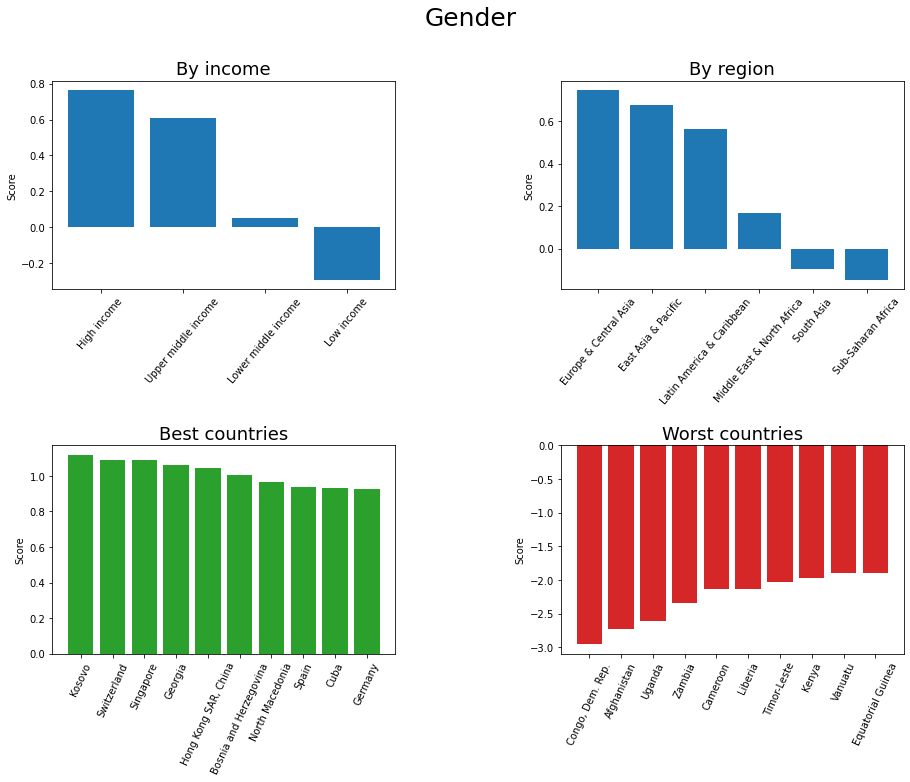

In [73]:
barplot_summary(gender_df, title='Gender')

## Violent crime

### Get metric

In [67]:
# imports violence data
intentional_homicides = pd.read_csv('C:/Users/HUAWEI/Desktop/Projects/Into-the-Wild/Data/intentional_homicides.csv')

# 
intentional_homicides.columns = ['Country', 'C Code', 'Indicator', 'I code'] + list(range(1960, 2023, 1))

#
intentional_homicides = intentional_homicides.iloc[4:len(intentional_homicides)].reset_index(drop=True)

#
intentional_homicides = intentional_homicides.drop(['C Code', 'Indicator', 'I code'], axis=1)

#
cols = ['Country'] + list(range(2010,2023, 1))
intentional_homicides.loc[:,cols]

# 
intentional_homicides_avg_df = intentional_homicides.mean(axis=1)
intentional_homicides_avg_df.index = intentional_homicides.Country

# 
not_null = intentional_homicides_avg_df.isnull().values==False
intentional_homicides_df = pd.DataFrame({'Avg': intentional_homicides_avg_df.loc[not_null]})

#
intentional_homicides_df.Avg = z_score(intentional_homicides_df.Avg)

intentional_homicides_df.Avg = intentional_homicides_df.Avg*-1

### Plot results

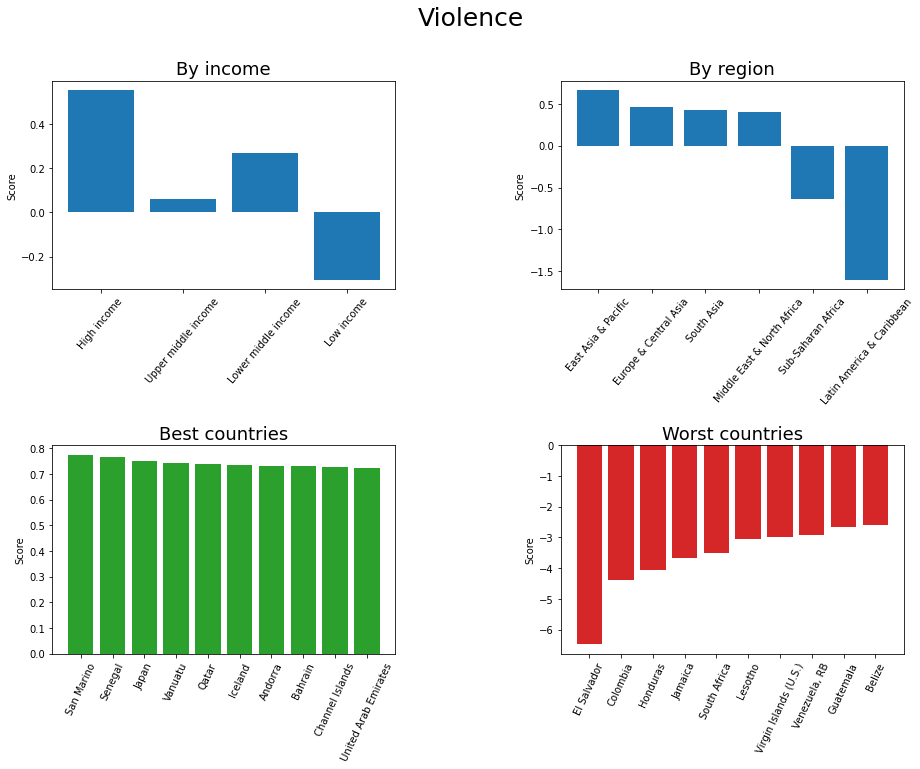

In [72]:
barplot_summary(intentional_homicides_df, title='Violence')